In [12]:
import divvy.ml_logic

import pandas as pd
import os

import matplotlib.pyplot as plt


In [3]:
df_2021=pd.read_csv('/Users/joachimclodic/code/G-Dolle/DIVVY_BIKE/raw_data/2021/2021bis.csv')
# df_2021=pd.DataFrame(df_2021)
df_2021.head()

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,0.0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NaN,NaN,NaN,NaN,41.93,-87.72,41.96,-87.73,casual
1,1,1.0,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NaN,NaN,NaN,NaN,41.96,-87.70,41.92,-87.70,casual
2,2,2.0,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NaN,NaN,NaN,NaN,41.96,-87.70,41.96,-87.70,casual
3,3,3.0,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NaN,NaN,NaN,NaN,41.94,-87.79,41.93,-87.79,casual
4,4,4.0,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NaN,NaN,NaN,NaN,41.90,-87.63,41.88,-87.62,casual


# Cleaning dataset with hourly data

In [4]:
from divvy.ml_logic.cleaning import cleaning_divvy_gen_agg

df_test=cleaning_divvy_gen_agg(df_2021)
df_test.head()

/Users/joachimclodic/code/G-Dolle/DIVVY_BIKE/divvy/ml_logic/cleaning.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stations_reduced.rename(columns={"name":"station_name"}, inplace=True)


,geohash,hourly_data,nb_departures,nb_arrivals,ratio
0,dp3sy,2021-03-10 03:00:00,2.0,0.0,inf
1,dp3sy,2021-03-15 22:00:00,2.0,0.0,inf
2,dp3sy,2021-03-20 14:00:00,2.0,0.0,inf
3,dp3sy,2021-03-21 16:00:00,2.0,0.0,inf
4,dp3sy,2021-03-22 21:00:00,4.0,0.0,inf


# Adding columns 'hour' and 'weekday'

In [7]:
import datetime as dt 

df_test['hour']=df_test['hourly_data'].dt.hour

df_test.head()

,geohash,hourly_data,nb_departures,nb_arrivals,ratio,hour
0,dp3sy,2021-03-10 03:00:00,2.0,0.0,inf,3
1,dp3sy,2021-03-15 22:00:00,2.0,0.0,inf,22
2,dp3sy,2021-03-20 14:00:00,2.0,0.0,inf,14
3,dp3sy,2021-03-21 16:00:00,2.0,0.0,inf,16
4,dp3sy,2021-03-22 21:00:00,4.0,0.0,inf,21


In [8]:
df_test['weekday']=df_test['hourly_data'].dt.weekday

df_test.head()

,geohash,hourly_data,nb_departures,nb_arrivals,ratio,hour,weekday
0,dp3sy,2021-03-10 03:00:00,2.0,0.0,inf,3,2
1,dp3sy,2021-03-15 22:00:00,2.0,0.0,inf,22,0
2,dp3sy,2021-03-20 14:00:00,2.0,0.0,inf,14,5
3,dp3sy,2021-03-21 16:00:00,2.0,0.0,inf,16,6
4,dp3sy,2021-03-22 21:00:00,4.0,0.0,inf,21,0


In [11]:
df_test=df_test.drop(columns=['ratio'])
df_test.head()

,geohash,hourly_data,nb_departures,nb_arrivals,hour,weekday
0,dp3sy,2021-03-10 03:00:00,2.0,0.0,3,2
1,dp3sy,2021-03-15 22:00:00,2.0,0.0,22,0
2,dp3sy,2021-03-20 14:00:00,2.0,0.0,14,5
3,dp3sy,2021-03-21 16:00:00,2.0,0.0,16,6
4,dp3sy,2021-03-22 21:00:00,4.0,0.0,21,0


# Graphical analysis

## Hourly 

In [14]:
df_per_hour=df_test.groupby(by=['hour'],as_index=False).mean().drop(columns=['weekday'])
df_per_hour.head(10)

/var/folders/gb/qjky1sf50r7fl6wr5lzmnwq40000gn/T/ipykernel_47616/2388466644.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_per_hour=df_test.groupby(by=['hour'],as_index=False).mean().drop(columns=['weekday'])


,hour,nb_departures,nb_arrivals
0,0,2.595451,2.682256
1,1,2.395472,2.552316
2,2,2.241512,2.446031
3,3,2.052386,2.307659
4,4,1.903536,1.984902
5,5,1.950890,1.877844
6,6,2.167379,2.303301
7,7,2.569091,2.748056
8,8,3.023826,2.957137
9,9,3.048990,3.060596


Text(0.5, 1.0, 'number of rides throughout the day')

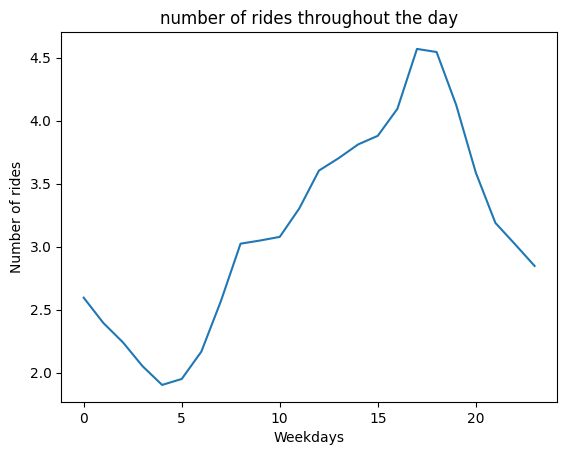

In [56]:
plt.plot(df_per_hour['hour'],df_per_hour['nb_departures'])
# plt.plot(df_per_hour['hour'],df_per_hour['nb_arrivals'])
plt.xlabel("Weekdays")
plt.ylabel("Number of rides")
plt.title("number of rides throughout the day")

# x=df_per_geohash['geohash']
# X_axis = np.arange(len(x))
# y1=df_per_geohash['nb_departures']
# y2=df_per_geohash['nb_arrivals']
# plt.bar(X_axis - 0.2,y1,0.4,label='departures')
# plt.bar(X_axis + 0.2,y2,0.4,label='arrivals')
# plt.legend()
# plt.xticks(X_axis, x)
# plt.xlabel("Geohash")
# plt.ylabel("Rides")
# plt.title("Departures and arrivals per geohash")

## Weekend vs weekdays

In [41]:
df_week=df_test
df_week=df_week.drop(columns=['hour'])
df_week=df_week.groupby(by=['weekday'],as_index=False).mean()
df_week.head()

/var/folders/gb/qjky1sf50r7fl6wr5lzmnwq40000gn/T/ipykernel_47616/3809955886.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_week=df_week.groupby(by=['weekday'],as_index=False).mean()


,weekday,nb_departures,nb_arrivals
0,0,3.149893,3.154243
1,1,3.149331,3.132170
2,2,3.143765,3.130021
3,3,3.091067,3.069768
4,4,3.228683,3.197471


In [45]:
dic={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_week['week_day']=df_week['weekday']
df_week['week_day']=df_week['week_day'].map(dic)
df_week.head()

,weekday,nb_departures,nb_arrivals,week_day
0,0,3.149893,3.154243,Mon
1,1,3.149331,3.132170,Tue
2,2,3.143765,3.130021,Wed
3,3,3.091067,3.069768,Thu
4,4,3.228683,3.197471,Fri


Text(0.5, 1.0, 'Nb of rides on weekend vs weekdays')

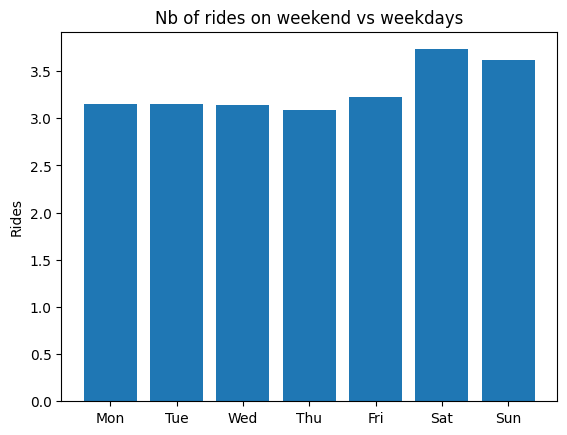

In [53]:

plt.bar(df_week['week_day'],df_week['nb_departures'])
plt.ylim(bottom=0)

plt.ylabel("Rides")
plt.title("Nb of rides on weekend vs weekdays")
# plt.bar(df_week['week_day'],df_week['nb_arrivals'])

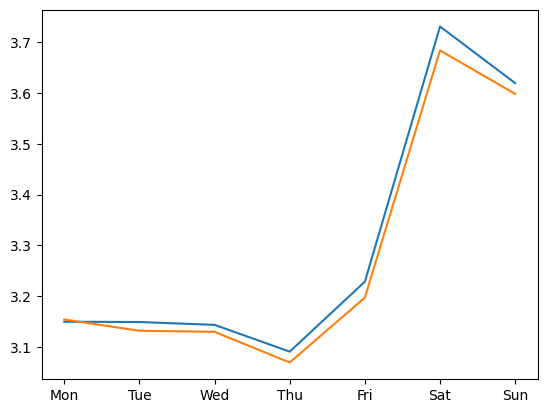

In [46]:
plt.plot(df_week['week_day'],df_week['nb_departures'])
plt.plot(df_week['week_day'],df_week['nb_arrivals'])

In [23]:
def weekday(x):
    if x<5: return 'weekday'
    else: return 'weekend'

df_weekend_vs_weekdays=df_week
df_weekend_vs_weekdays['weekday']=df_weekend_vs_weekdays['weekday'].apply(lambda x: weekday(x))
df_weekend_vs_weekdays.head()

,weekday,nb_departures,nb_arrivals
0,weekday,3.149893,3.154243
1,weekday,3.149331,3.132170
2,weekday,3.143765,3.130021
3,weekday,3.091067,3.069768
4,weekday,3.228683,3.197471


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Nb of rides on weekend vs weekdays')

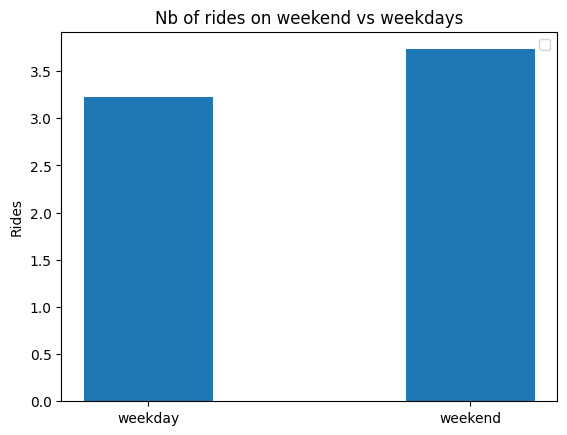

In [55]:
x=df_weekend_vs_weekdays['weekday']
X_axis = df_weekend_vs_weekdays['weekday'].nunique()
y1=df_weekend_vs_weekdays['nb_departures']
# y2=df_weekend_vs_weekdays['nb_arrivals']
plt.bar(x,y1,0.4)#,label='departures')
# plt.bar(x,y2,0.4)#,label='arrivals')
plt.legend()
plt.ylim(bottom=0)
# plt.xticks(X_axis, x)
# plt.xlabel("Geohash")
plt.ylabel("Rides")
plt.title("Nb of rides on weekend vs weekdays")

## Hourly: weekend vs weekdays

## Hourly ratio

## Weekly ratio